In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'vscode'
pio.templates.default = 'plotly'

Downloading data and unzipping it:

In [20]:
!kaggle competitions download -c predict-electricity-consumption
!tar -xf predict-electricity-consumption.zip
!mkdir data
!move train.csv data
!move test.csv data
!move sample_submission.csv data
!del predict-electricity-consumption.zip


  0%|          | 0.00/174k [00:00<?, ?B/s]
100%|██████████| 174k/174k [00:00<00:00, 1.42MB/s]
100%|██████████| 174k/174k [00:00<00:00, 1.41MB/s]
A subdirectory or file data already exists.


        1 file(s) moved.
        1 file(s) moved.
        1 file(s) moved.


In [28]:
train = pd.read_csv('data/train.csv')

In [17]:
train.head()

time  temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt  \
0  2021-09-01 00:00:00+03:00  11.2  10.3  94.0   NaN   NaN  320.0   7.2  16.7   
1  2021-09-01 01:00:00+03:00  10.7   9.6  93.0   NaN   NaN  320.0   7.2  13.0   
2  2021-09-01 02:00:00+03:00   9.9   9.0  94.0   NaN   NaN  320.0   7.2  13.0   
3  2021-09-01 03:00:00+03:00  10.0   8.4  90.0   NaN   NaN  330.0   7.2  13.0   
4  2021-09-01 04:00:00+03:00   9.0   8.1  94.0   NaN   NaN  300.0   3.6  13.0   

     pres  coco  el_price  consumption  
0  1012.6   2.0   0.09016        0.577  
1  1012.6   2.0   0.09251        0.594  
2  1012.2   2.0   0.08890        0.685  
3  1011.9   1.0   0.08735        1.016  
4  1011.4   2.0   0.08688        0.677

In [18]:
train.shape

(8592, 13)

In [19]:
train.dtypes

time            object
temp           float64
dwpt           float64
rhum           float64
prcp           float64
snow           float64
wdir           float64
wspd           float64
wpgt           float64
pres           float64
coco           float64
el_price       float64
consumption    float64
dtype: object

In [6]:
# Count missing values
train.isna().sum()

time              0
temp              0
dwpt              0
rhum              0
prcp           6433
snow           8473
wdir              0
wspd              0
wpgt              0
pres              0
coco            196
el_price          0
consumption       2
dtype: int64

In [53]:
train['time'] = pd.to_datetime(train['time'], utc=True).dt.tz_convert('Europe/Tallinn')

In [60]:
train.set_index('time', drop=True, inplace=True)

In [78]:
missing_consumption = train.loc[train['consumption'].isnull()]
missing_consumption

temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt  \
time                                                                         
2021-10-31 03:00:00+02:00   7.1   5.2  88.0   NaN   NaN  180.0  10.8  18.5   
2022-03-27 04:00:00+03:00  -2.7 -10.5  55.0   NaN   NaN  330.0  14.4  38.9   

                             pres  coco  el_price  consumption  
time                                                            
2021-10-31 03:00:00+02:00  1015.2   1.0   0.06003          NaN  
2022-03-27 04:00:00+03:00  1020.6   2.0   0.10007          NaN

In [92]:
missing_consumption_iloc = [train.index.get_loc(missing_consumption.iloc[row].name) for row in range(missing_consumption.shape[0])]
missing_consumption_iloc

[1444, 4972]

In [96]:
for iloc in missing_consumption_iloc:
  train['consumption'].iloc[iloc] = train['consumption'].iloc[iloc-15:iloc+15].mean()

In [8]:
train.coco.value_counts().sort_index()

1.0     1815
2.0     1716
3.0     1120
4.0     1467
5.0      232
6.0        2
7.0      623
8.0       94
9.0       17
10.0      18
12.0      48
13.0       2
14.0     767
15.0      38
16.0       1
17.0     179
18.0     113
19.0      13
20.0       1
21.0     104
22.0      10
23.0       1
25.0      15
Name: coco, dtype: int64

In [10]:
fig = px.line(train, x='time', y=train.columns)
fig.show()

In [99]:
from statsmodels.tsa.seasonal import seasonal_decompose
additive_decomposition = seasonal_decompose(train['consumption'], model='additive')

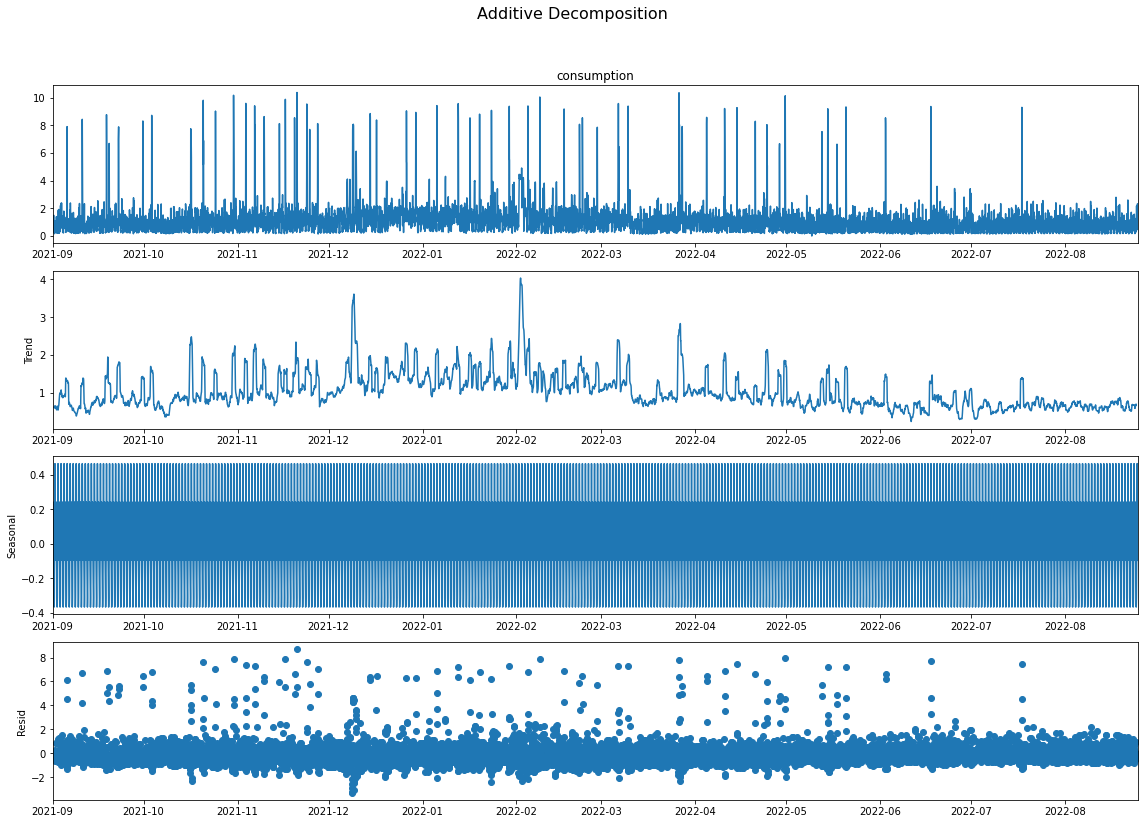

In [101]:
plt.rcParams.update({'figure.figsize': (16,12)})
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [107]:
train['consumption'].min()

0.0